## 1. Project Summary:
The objective of this project is to develop a text classification model that can accurately differentiate between scam and legitimate messages based on their content.

## About the Dataset: SMS scam Collection

### Context
The SMS scam Collection dataset comprises SMS messages categorized as either legitimate (ham) or scam, gathered for research on SMS scam. It contains a dataset consisting of 5,574 SMS messages in English.

### Content
Each file in the dataset contains individual messages, with each line comprising two columns:
- `v1`: Represents the label (ham or scam).
- `v2`: Contains the raw text of the message.

### Source
The dataset is accessible on Kaggle via the following link: [SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)


## 2. Data Preparation

### Libraries Imported:

### 1. `numpy` and `pandas`:
   - **Purpose:** These libraries are fundamental for data manipulation and analysis.
   - **Usage:** They are utilized for handling datasets, such as loading and processing data.

### 2. `matplotlib.pyplot` and `seaborn`:
   - **Purpose:** These libraries are used for data visualization.
   - **Usage:** They facilitate the creation of plots and graphs to visualize data distributions and patterns.

### 3. `nltk` (Natural Language Toolkit):
   - **Purpose:** NLTK is a platform for building Python programs to work with human language data.
   - **Usage:** It is employed here for text preprocessing tasks, such as tokenization, stemming, and removal of stopwords.

### 4. `sklearn` (Scikit-learn):
   - **Purpose:** Scikit-learn provides simple and efficient tools for data mining and data analysis.
   - **Usage:** It is utilized for various machine learning tasks, including feature extraction, model training, and evaluation.

### 5. `tensorflow.keras`:
   - **Purpose:** Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow.
   - **Usage:** It is used here for implementing neural network models for text classification.

### 6. `wordcloud`:
   - **Purpose:** Wordcloud is a visualization technique used for displaying frequently occurring words in text data.
   - **Usage:** It helps in gaining insights into the most common words present in the dataset.

### 7. `termcolor`:
   - **Purpose:** Termcolor is used for producing colored output in the terminal.
   - **Usage:** It enhances readability by highlighting important messages or notifications.



In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Added Seaborn for visualization

# For Text Preprocessing with NLTK
import re
import string
import nltk  # Added NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# For Machine Learning Models and Evaluation

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer  # Import CountVectorizer from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For Neural Network Implementation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPooling1D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Download NLTK resources if needed
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from wordcloud import WordCloud 

from termcolor import colored  # For colored output

# Informative message confirming successful import of necessary libraries
print(colored("\nNECESSARY LIBRARIES WERE SUCCESSFULLY IMPORTED...", color="blue", attrs=["bold", "dark"]))



NECESSARY LIBRARIES WERE SUCCESSFULLY IMPORTED...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kpkum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kpkum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kpkum\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### 2.1 Reading and displaying the first few rows of the CSV File:
   - **Purpose:** Read the CSV file containing scam data.
   - **Usage:** Utilized Pandas' `read_csv()` function to load the dataset into a DataFrame.
   - **Purpose:** Provide a preview of the dataset.
   - **Usage:** Used the `head()` method to display the first few rows of the DataFrame.


In [2]:
# Read the CSV file containing scam data
data = pd.read_csv("C:/Users/kpkum/Desktop/Kumaravel_FYP/spam.csv", encoding="ISO-8859-1", engine="python")

# Display the first few rows
data.head()



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### 2.2 Renaming Dataset Columns:
   - **Purpose:** Improve column naming for better clarity.
   - **Usage:** Renamed columns 'v1' to 'target' and 'v2' to 'text' using the `rename()` method.

In [3]:
#rename dataset columns
data.rename(columns = {"v1": "target", "v2": "text"}, inplace = True)

#drop unnecessary columns
data.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True)

# Display the first few rows
data.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Display concise summary information about the DataFrame 'data' 
# including memory usage details and verbosity enabled
data.info(memory_usage=True, verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# Calculate the number of duplicated values in the dataset and print the count in a colored format
duplicated_count = data.duplicated().sum()  # Count duplicated values in the DataFrame 'data'

# Print the count of duplicated values using colored output
print(colored("There are {} duplicated values in the dataset".format(duplicated_count), color="blue", attrs=["bold", "dark"]))


There are 403 duplicated values in the dataset


### 2.3 Dropping Unnecessary Columns:
   - **Purpose:** Remove irrelevant columns to streamline the dataset.
   - **Usage:** Dropped columns 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4' using the `drop()` method.

In [6]:
# Remove duplicate rows from the DataFrame 'data' and modify it in place
data.drop_duplicates(inplace=True)


In [7]:
# Group the data by the 'target' column and count occurrences in each group
grouped_target = data.groupby("target").count()

# Extract the 'text' column from the grouped data
target_text_count = grouped_target["text"]

# Check the count of null values in each column of the DataFrame 'data'
data.isnull().sum()



target    0
text      0
dtype: int64

### 3.Explorartory Data Analysis

In this segment of my project, I had decided to take a deeper look into the scam dataseheet and generate some insigts.

### 3.1 Identify (ham or scam) frequencies

I wanted to visually represent the distribution of classes (‘ham’ and ‘scam’) in the dataset. By creating a bar plot, I aim to provide an overview of the frequency of each class, which helps in understanding the balance of classes in the dataset.

C:\Users\kpkum\anaconda3\envs\kumaravel_FYP_2023\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kpkum\anaconda3\envs\kumaravel_FYP_2023\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kpkum\anaconda3\envs\kumaravel_FYP_2023\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, "Class (ham or scam) frequencies of 'target' variable")]

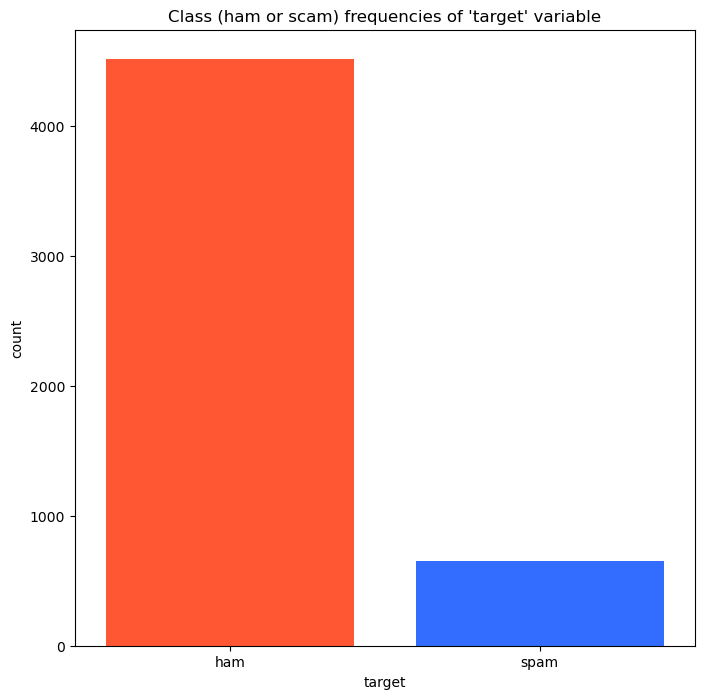

In [8]:
# Set up the figure for plotting a bar chart
plt.figure(figsize=[8, 8], clear=True, facecolor="white")

# Define two different colors for the bar plot
colors = ["#FF5733", "#336DFF"]

# Create a bar plot displaying the frequencies of classes in the 'target' variable
sns.barplot(
    x=data["target"].value_counts().index,  # X-axis: class labels
    y=data["target"].value_counts(),  # Y-axis: count of each class
    palette=colors,  # Assign the defined colors to the bars
    saturation=1  # Adjusts the intensity of colors
).set(
    title="Class (ham or scam) frequencies of 'target' variable"  # Set the plot title
)


### 3.2 Identify Counts of ham and scam messages

I wanted to visualize the distribution of classes ('ham' and 'scam') in the 'target' variable using a pie chart. This chart allows for a clear representation of the proportion of each class within the dataset.


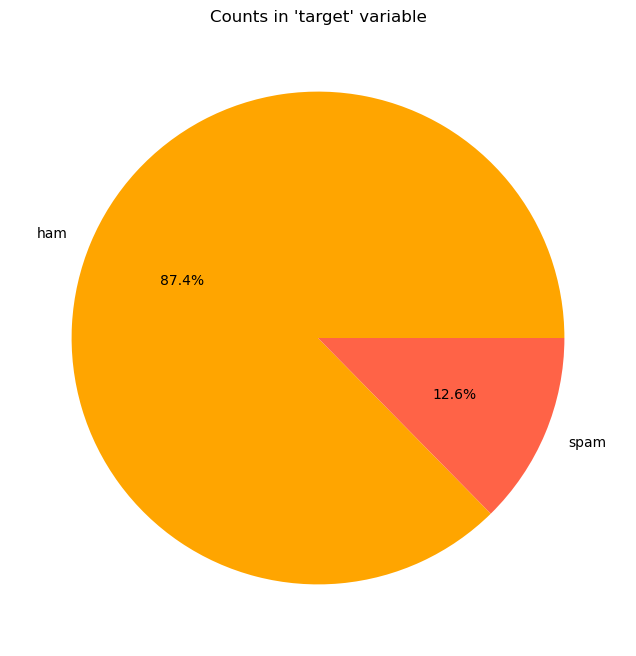

In [9]:
# Calculate value counts for 'target' column
target_counts = data['target'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['#FFA500', '#FF6347'])
plt.title("Counts in 'target' variable")
plt.show()


### 3.3 Identify character count, word count and sentence count and generate stats

I wanted to transform the text data in the 'text' column by calculating the character count, word count, and sentence count for each text. Additionally, descriptive statistics are generated for the added columns to provide insights into the distribution of these features within the dataset.

In [10]:
# Calculate the character count for each text in the 'text' column and store it in a new column 'ch_no'
data["ch_no"] = data["text"].apply(len)

# Calculate the word count for each text using NLTK word_tokenize and store it in a new column 'wd_no'
data["wd_no"] = data.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1).apply(len)

# Calculate the sentence count for each text using NLTK sent_tokenize and store it in a new column 'sn_no'
data["sn_no"] = data.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1).apply(len)

# Generate descriptive statistics for the added columns and apply background color in a orange gradient style
data.describe().T.style.background_gradient(cmap="Oranges")


,count,mean,std,min,25%,50%,75%,max
ch_no,5169.000000,78.977945,58.236293,2.000000,36.000000,60.000000,117.000000,910.000000
wd_no,5169.000000,18.455794,13.324758,1.000000,9.000000,15.000000,26.000000,220.000000
sn_no,5169.000000,1.965564,1.448541,1.000000,1.000000,1.000000,2.000000,38.000000


### 3.4 Generating pairplot 

Create a pairplot using Seaborn to visualize pairwise relationships in the dataset


C:\Users\kpkum\anaconda3\envs\kumaravel_FYP_2023\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kpkum\anaconda3\envs\kumaravel_FYP_2023\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kpkum\anaconda3\envs\kumaravel_FYP_2023\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kpkum\anaconda3\envs\kumaravel_FYP_2023\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

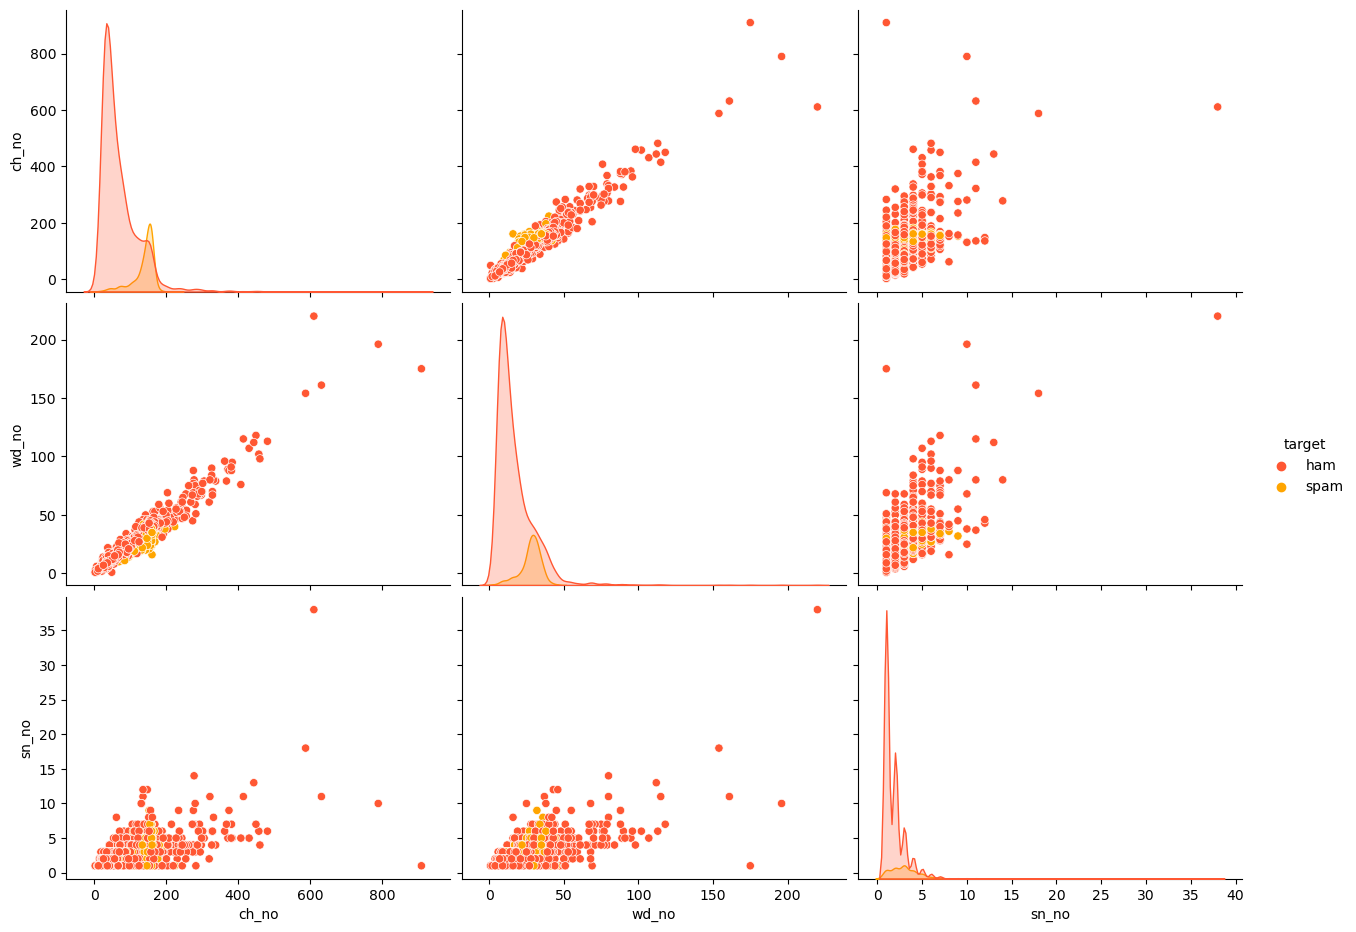

In [11]:
# Create a pairplot using Seaborn to visualize pairwise relationships in the dataset
fig = sns.pairplot(
    data=data,  # Data to be plotted
    hue="target",  # Variable for coloring the plot
    palette=["#FF5733", "#FFA500"],  # Define the palette colors (red and orange)
    height=3.15,  # Height of each subplot
    aspect=1.35  # Aspect ratio of the plots
)

# Show the pairplot
plt.show(fig)


### 3: Data Preprocessing


- Cleaned the text data by eliminating punctuation, URLs, and stopwords.
- Applied stemming and tokenization to prepare the messages for analysis.



In [12]:
def clean_text(text):
    text = str(text).lower()  # Convert text to lowercase
    text = re.sub('\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove newline characters
    text = re.sub('\w*\d\w*', '', text)  # Remove alphanumeric words with digits
    return text


In [13]:
# Assuming 'data' is your DataFrame
data['text_clean'] = data['text'].apply(clean_text)

# Keeping only 'text_clean' and 'target' columns
data = data[['text_clean', 'target']]
data.head()


,text_clean,target
0,go until jurong point crazy available only in ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup final...,spam
3,u dun say so early hor u c already then say,ham
4,nah i dont think he goes to usf he lives aroun...,ham


#### 3.1 preprocess the text data by removing stopwords, 

Stopwords are commonly occurring words that do not typically contribute to the meaning of the text. The provided code implements a function to remove stopwords from the 'text_clean' column in the dataset.


In [14]:
stop_words = stopwords.words('english')  # Get English stopwords

more_stopwords = ['u', 'im', 'c']  # Additional stopwords

stop_words = stop_words + more_stopwords  # Combine all stopwords

def remove_stopwords(text):
    # Remove stopwords from text
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
data['text_clean'] = data['text_clean'].apply(remove_stopwords)  # Apply removal function to 'text_clean' column
data.head()  # Display updated 'text_clean' data


C:\Users\kpkum\AppData\Local\Temp\ipykernel_6268\532766798.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_clean'] = data['text_clean'].apply(remove_stopwords)  # Apply removal function to 'text_clean' column


,text_clean,target
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif oni,ham
2,free entry wkly comp win fa cup final tkts m...,spam
3,dun say early hor already say,ham
4,nah dont think goes usf lives around though,ham


#### 3.2 further preprocess the text data 

By applying stemming, a technique used to reduce words to their root or base form. The provided code utilizes the Snowball stemmer for English to stem words in the 'text_clean' column of the dataset.


In [15]:
stemmer = nltk.SnowballStemmer("english")  # Initialize Snowball stemmer for English

def stemm_text(text):
    # Stem words in text
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text


In [16]:
data['text_clean'] = data['text_clean'].apply(stemm_text)  # Apply stemming function to 'text_clean' column
data.head()  # Display the first few rows of the updated 'text_clean' data


C:\Users\kpkum\AppData\Local\Temp\ipykernel_6268\1116890594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_clean'] = data['text_clean'].apply(stemm_text)  # Apply stemming function to 'text_clean' column


,text_clean,target
0,go jurong point crazi avail bugi n great world...,ham
1,ok lar joke wif oni,ham
2,free entri wkli comp win fa cup final tkts m...,spam
3,dun say earli hor alreadi say,ham
4,nah dont think goe usf live around though,ham


#### 3.3 Developing a preprocessing function that can be used on the dataset

Below I have developed a function `preprocess_data(text)` which helps to perform a series of preprocessing steps (based on the steps provided above) on input text data. These steps include cleaning punctuation and URLs, removing stopwords, and stemming the remaining words.

In [17]:
def preprocess_data(text):
    # Clean punctuation, URLs, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    # Stem all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    
    return text


In [18]:
data['text_clean'] = data['text_clean'].apply(preprocess_data)  # Apply preprocess_data function to 'text_clean' column
data.head()  # Display the first few rows of the updated 'text_clean' data


C:\Users\kpkum\AppData\Local\Temp\ipykernel_6268\2447491990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_clean'] = data['text_clean'].apply(preprocess_data)  # Apply preprocess_data function to 'text_clean' column


,text_clean,target
0,go jurong point crazi avail bugi n great world...,ham
1,ok lar joke wif oni,ham
2,free entri wkli comp win fa cup final tkts m...,spam
3,dun say ear hor alreadi say,ham
4,nah dont think goe usf live around though,ham


#### 3.4 Labeling the data

I had then perform label encoding on the categorical target variable ('target') in the dataset. Label encoding is a preprocessing technique used to convert categorical labels into numerical format, which is required by many machine learning algorithms.

In [19]:
le = LabelEncoder()  # Initialize LabelEncoder

le.fit(data['target'])  # Fit LabelEncoder to 'target' column

data['target_encoded'] = le.transform(data['target'])  # Transform 'target' column and assign to 'target_encoded'
data.head()  # Display the first few rows including the 'target_encoded' data


C:\Users\kpkum\AppData\Local\Temp\ipykernel_6268\2507877696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target_encoded'] = le.transform(data['target'])  # Transform 'target' column and assign to 'target_encoded'


,text_clean,target,target_encoded
0,go jurong point crazi avail bugi n great world...,ham,0
1,ok lar joke wif oni,ham,0
2,free entri wkli comp win fa cup final tkts m...,spam,1
3,dun say ear hor alreadi say,ham,0
4,nah dont think goe usf live around though,ham,0


#### 3.5 Further explorartory data analysis on dataset

I had proceeded to develop a function `plot_word_frequencies(text_data, n=10)` is to visualize the frequency distribution of the top N words in the input text data. This function employs Seaborn for plotting bar charts displaying word frequencies.


C:\Users\kpkum\anaconda3\envs\kumaravel_FYP_2023\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kpkum\anaconda3\envs\kumaravel_FYP_2023\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kpkum\anaconda3\envs\kumaravel_FYP_2023\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\kpkum\anaconda3\envs\kumaravel_FYP_2023\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a fu

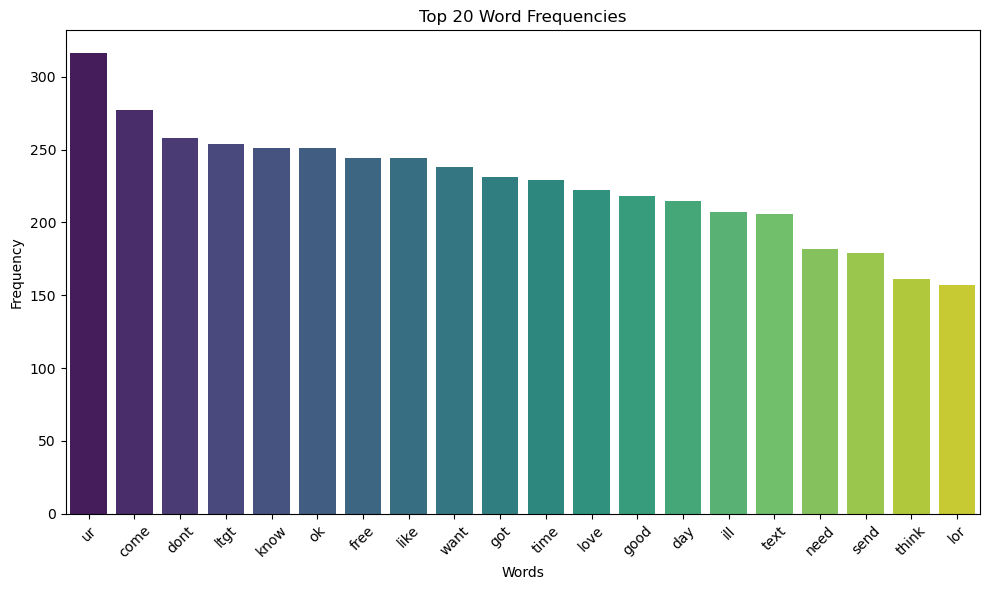

In [20]:

# Function to plot word frequencies with Seaborn

def plot_word_frequencies(text_data, n=10):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(text_data)
    word_freq = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:n]

    words, frequencies = zip(*sorted_word_freq)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(frequencies), palette='viridis')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {n} Word Frequencies')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


text_data = data['text_clean']  

# Plotting top N word frequencies with Seaborn
plot_word_frequencies(text_data, n=20)  # Change 'n' to display more or fewer top words

#### 3.6 Wordcloud generation of top words labelled as ham

I had generated and visualized a WordCloud representing the most frequent words in messages labeled as 'ham' (non-scam) in the dataset. WordClouds are graphical representations of word frequency in a corpus, with word size indicating frequency.


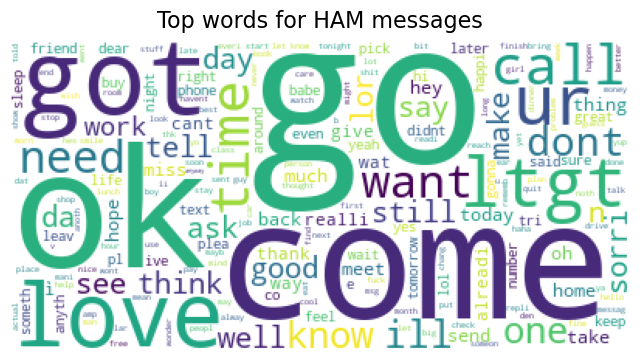

In [21]:
# WordCloud configuration
wc = WordCloud(
    background_color='white',  # Set background color
    max_words=200,  # Maximum number of words to display
)

# Generating WordCloud for messages labeled as 'ham'
wc.generate(' '.join(text for text in data.loc[data['target'] == 'ham', 'text_clean']))

# Plotting WordCloud
plt.figure(figsize=(8, 10))  # Setting figure size
plt.title('Top words for HAM messages',  # Setting the title
          fontdict={'size': 16, 'verticalalignment': 'bottom'})  # Title font settings

plt.imshow(wc)  # Displaying the WordCloud
plt.axis("off")  # Removing axis
plt.show()  # Showing the plot


#### 3.7 Wordcloud generation of top words labelled as scam



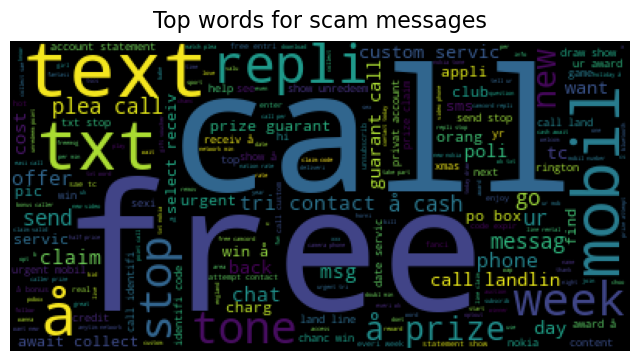

In [22]:
# WordCloud configuration
wc = WordCloud(
    background_color='black',  # Set background color
    max_words=200,  # Maximum number of words to display
)

# Generating WordCloud for messages labeled as 'ham'
wc.generate(' '.join(text for text in data.loc[data['target'] == 'spam', 'text_clean']))

# Plotting WordCloud
plt.figure(figsize=(8, 10))  # Setting figure size
plt.title('Top words for scam messages',  # Setting the title
          fontdict={'size': 16, 'verticalalignment': 'bottom'})  # Title font settings

plt.imshow(wc)  # Displaying the WordCloud
plt.axis("off")  # Removing axis
plt.show()  # Showing the plot

### 4. Feature extraction

**Word Embeddings:**
- Utilized pre-trained GloVe word embeddings to capture semantic meaning in the text.
- Constructed an embedding matrix to represent words as vectors.

#### 4.1 Split textual data

split the preprocessed text data (`x`) and the encoded target variable (`y`) into training and testing sets for machine learning model training and evaluation. Additionally, the code initializes and fits a CountVectorizer to transform the text data into numerical features.

In [23]:
x = data['text_clean']  # Assign 'text_clean' column to x
y = data['target_encoded']  # Assign 'target_encoded' column to y

print(len(x), len(y))  # Print the lengths of x and y


5169 5169


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)  # Split x and y into training and testing sets

print(len(x_train), len(y_train))  # Print lengths of training data
print(len(x_test), len(y_test))  # Print lengths of testing data


3876 3876
1293 1293


In [25]:
vect = CountVectorizer()  # Instantiate the CountVectorizer
vect.fit(x_train)  # Fit the vectorizer on the training data (x_train)


CountVectorizer()

#### 4.2 transform the preprocessed text data 

I had transformed the data into numerical representations suitable for machine learning models. This involves vectorizing the text data using CountVectorizer and transforming it into TF-IDF (Term Frequency-Inverse Document Frequency) representation.


In [26]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)  # Transform the testing data (x_test) using the fitted CountVectorizer


In [27]:
vect_tunned = CountVectorizer(
    stop_words='english',  # Remove English stop words
    ngram_range=(1, 2),    # Consider both unigrams and bigrams
    min_df=0.1,            # Ignore terms that appear in less than 10% of the documents
    max_df=0.7,            # Ignore terms that appear in more than 70% of the documents
    max_features=100       # Limit the vocabulary size to the top 100 features
)


In [28]:
tfidf_transformer = TfidfTransformer()  # Instantiate TfidfTransformer

tfidf_transformer.fit(x_train_dtm)  # Fit the transformer on the training DTM (x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)  # Transform the training DTM to TF-IDF representation
x_train_tfidf  # Display the transformed TF-IDF representation of the training data


<3876x5664 sparse matrix of type '<class 'numpy.float64'>'
	with 29780 stored elements in Compressed Sparse Row format>

In [29]:
texts = data['text_clean']  # Assign 'text_clean' column to texts
target = data['target_encoded']  # Assign 'target_encoded' column to target


#### 4.3 perform text embedding and padding 

I had proceeded to perform text embedding and padding  on the preprocessed text data to prepare it for input into a neural network model. Text embedding converts text data into numerical sequences, while padding ensures uniform length for input sequences.


In [30]:
word_tokenizer = Tokenizer()  # Initialize Tokenizer

word_tokenizer.fit_on_texts(texts)  # Fit Tokenizer on the text data (texts)

vocab_length = len(word_tokenizer.word_index) + 1  # Calculate vocabulary length (+1 for the reserved 0 index)
vocab_length  # Display the calculated vocabulary length


6726

In [31]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)  # Convert text to sequences using word_tokenizer

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))  # Find the longest sentence
length_long_sentence = len(word_tokenize(longest_train))  # Calculate length of the longest sentence

train_padded_sentences = pad_sequences(
    embed(texts),  # Convert texts to sequences
    maxlen=length_long_sentence,  # Set the maximum sequence length to the length of the longest sentence
    padding='post'  # Pad sequences after the sentences
)

train_padded_sentences  # Display the padded sequences of the training data


array([[   2, 2885,  261, ...,    0,    0,    0],
       [   8,  219,  543, ...,    0,    0,    0],
       [  10,  394,  770, ...,    0,    0,    0],
       ...,
       [6724, 1353, 6725, ...,    0,    0,    0],
       [ 134, 1162, 1489, ...,    0,    0,    0],
       [1832,  417,  181, ...,    0,    0,    0]])

#### 4.4 Using GloVe

I had integrated a pre-trained GloVe word embeddings into the text data and split the data into training and testing sets for my machine learning model training and evaluation.

In [32]:
embeddings_dictionary = dict()  # Create an empty dictionary to store word embeddings
embedding_dim = 100  # Define the embedding dimension

# Load GloVe 100D embeddings with specified encoding
with open('C:/Users/kpkum/Desktop/Kumaravel_FYP/glove.6B.100d.txt', encoding='utf-8') as fp:
    for line in fp.readlines():
        records = line.split()  # Split each line by spaces
        word = records[0]  # Extract the word
        vector_dimensions = np.asarray(records[1:], dtype='float32')  # Extract vector dimensions as numpy array
        embeddings_dictionary[word] = vector_dimensions  # Store the word and its embedding in the dictionary


In [33]:
embedding_matrix = np.zeros((vocab_length, embedding_dim))  # Initialize an embedding matrix with zeros

for word, index in word_tokenizer.word_index.items():  # Iterate through word indices
    embedding_vector = embeddings_dictionary.get(word)  # Get the embedding vector for the word
    if embedding_vector is not None:  # If an embedding vector exists for the word
        embedding_matrix[index] = embedding_vector  # Update the embedding matrix with the vector


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences,  # Features: padded sequences of sentences
    target,  # Target variable
    test_size=0.25  # Splitting ratio: 75% training, 25% testing
)


### 5.Model Architecture:
- Designed a neural network using Keras, incorporating layers like LSTM, GlobalMaxPooling, and Dense layers.
- Integrated pre-trained word embeddings into the model structure.

#### 5.1 Glove Lstm

I have defined a Long Short-Term Memory (LSTM) neural network model with GloVe pre-trained word embeddings for text classification tasks.

In [35]:



def glove_lstm():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0],  # Vocabulary size
        output_dim=embedding_matrix.shape[1],  # Embedding dimension
        weights=[embedding_matrix],  # Pre-trained embedding weights
        input_length=length_long_sentence  # Input sequence length
    ))
    
    model.add(Bidirectional(LSTM(
        length_long_sentence,  # LSTM units
        return_sequences=True,  # Return sequences for next layer
        recurrent_dropout=0.2  # Recurrent dropout rate
    )))
    
    model.add(GlobalMaxPooling1D())  # GlobalMaxPooling
    model.add(BatchNormalization())  # Batch normalization
    model.add(Dropout(0.5))  # Dropout layer
    model.add(Dense(length_long_sentence, activation="relu"))  # Dense layer with ReLU activation
    model.add(Dropout(0.5))  # Dropout layer
    model.add(Dense(length_long_sentence, activation="relu"))  # Dense layer with ReLU activation
    model.add(Dropout(0.5))  # Dropout layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer with Sigmoid activation
    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])  # Compile the model
    
    return model

model = glove_lstm()  # Create the model
model.summary()  # Display the model summary


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 100)           672600    
                                                                 
 bidirectional (Bidirection  (None, 80, 160)           115840    
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 160)               0         
 alMaxPooling1D)                                                 
                                                                 
 batch_normalization (Batch  (None, 160)               640       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                        

### 6.Model Training

#### 6.1 Training my model

I had defined LSTM model with GloVe pre-trained word embeddings using training data and monitor its performance using validation data. Additionally, the code implements callbacks to save the best model during training and reduce the learning rate dynamically based on validation loss. 

In [36]:
model = glove_lstm()  # Create the model

checkpoint = ModelCheckpoint(
    'model.h5',  # Save the best model with specified name
    monitor='val_loss',  # Monitor validation loss
    verbose=1,  # Show information about the checkpoint process
    save_best_only=True  # Save only the best model
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.2,  # Reduce learning rate by a factor of 0.2
    verbose=1,  # Show information about the reduction process
    patience=5,  # Wait for 5 epochs before reducing learning rate
    min_lr=0.001  # Lower bound for learning rate
)


In [37]:
history = model.fit(
    X_train,  # Training features
    y_train,  # Training labels
    epochs=7,  # Number of training epochs
    batch_size=32,  # Batch size
    validation_data=(X_test, y_test),  # Validation data
    verbose=1,  # Show training progress
    callbacks=[reduce_lr, checkpoint]  # Callbacks for model checkpoint and learning rate reduction
)


Epoch 1/7
122/122 [==============================] - ETA: 0s - loss: 0.3380 - accuracy: 0.8705
Epoch 1: val_loss improved from inf to 0.37626, saving model to model.h5
122/122 [==============================] - 17s 90ms/step - loss: 0.3380 - accuracy: 0.8705 - val_loss: 0.3763 - val_accuracy: 0.9606 - lr: 0.0010
Epoch 2/7
  1/122 [..............................] - ETA: 10s - loss: 0.1758 - accuracy: 0.9062

C:\Users\kpkum\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/122 [==============================] - ETA: 0s - loss: 0.1943 - accuracy: 0.9373
Epoch 2: val_loss improved from 0.37626 to 0.12173, saving model to model.h5
122/122 [==============================] - 10s 85ms/step - loss: 0.1943 - accuracy: 0.9373 - val_loss: 0.1217 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 3/7
122/122 [==============================] - ETA: 0s - loss: 0.1538 - accuracy: 0.9582
Epoch 3: val_loss improved from 0.12173 to 0.09971, saving model to model.h5
122/122 [==============================] - 11s 86ms/step - loss: 0.1538 - accuracy: 0.9582 - val_loss: 0.0997 - val_accuracy: 0.9613 - lr: 0.0010
Epoch 4/7
121/122 [============================>.] - ETA: 0s - loss: 0.1143 - accuracy: 0.9646
Epoch 4: val_loss improved from 0.09971 to 0.06770, saving model to model.h5
122/122 [==============================] - 10s 86ms/step - loss: 0.1141 - accuracy: 0.9647 - val_loss: 0.0677 - val_accuracy: 0.9776 - lr: 0.0010
Epoch 5/7
122/122 [==============================] - ETA

#### 6.2 Visualize the training and validation 

I proceeded to visualize the training and validation loss as well as the training and validation accuracy over epochs to assess the performance of the LSTM model with GloVe pre-trained word embeddings.

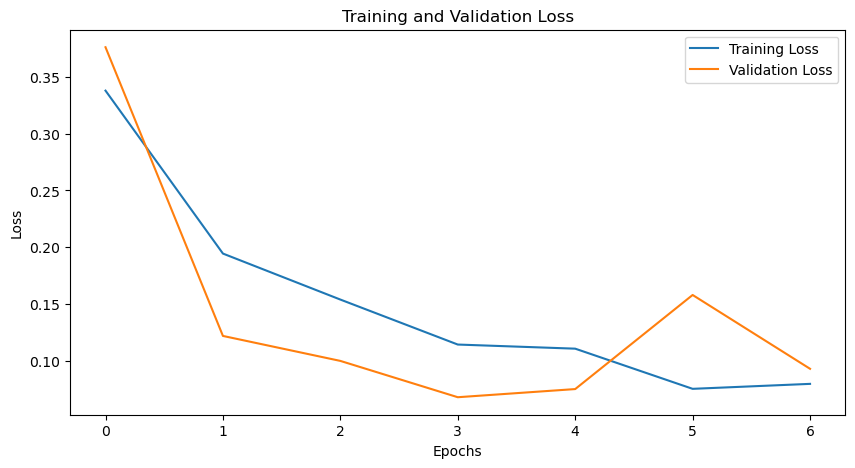

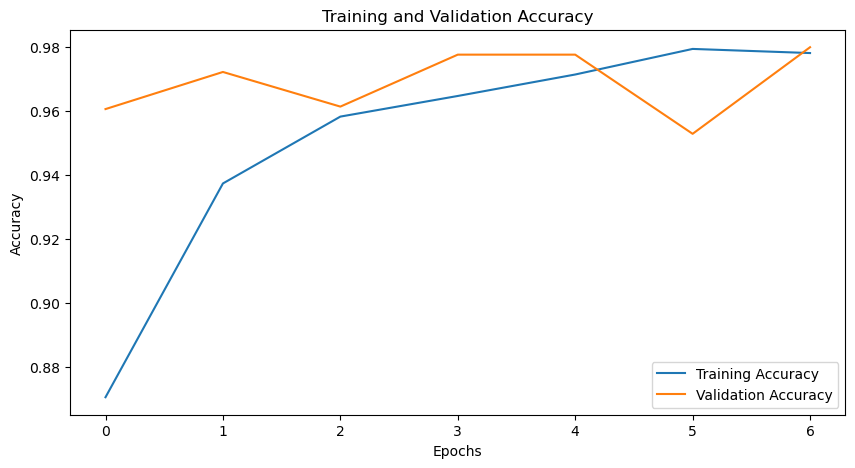

In [38]:
# Retrieve training history
loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss
accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



#### 6.3 Sample Predictions

I had made predictions on the testing data using the trained LSTM model with GloVe pre-trained word embeddings. The predictions are thresholded to obtain class predictions based on the predicted probabilities.


In [39]:
# Make predictions on the test data
predictions = model.predict(X_test)  # Obtain predicted probabilities

# Threshold the probabilities to obtain class predictions
preds = (predictions > 0.5).astype(int)  # Adjust threshold based on problem requirements


41/41 [==============================] - 1s 13ms/step


#### 6.4 Evaluating my model

I had calculated the evaluation metrics to assess the performance of the LSTM model on the testing data. The calculated metrics include accuracy, precision, recall, and F1 score.


In [40]:

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, preds)  # Accuracy
precision = precision_score(y_test, preds)  # Precision
recall = recall_score(y_test, preds)  # Recall
f1 = f1_score(y_test, preds)  # F1 Score

# Print the metrics
print(f"Accuracy: {accuracy}")  # Print accuracy
print(f"Precision: {precision}")  # Print precision
print(f"Recall: {recall}")  # Print recall
print(f"F1 Score: {f1}")  # Print F1 Score


Accuracy: 0.979891724671307
Precision: 0.9848484848484849
Recall: 0.8441558441558441
F1 Score: 0.9090909090909091


In [41]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, preds)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1137    2]
 [  24  130]]


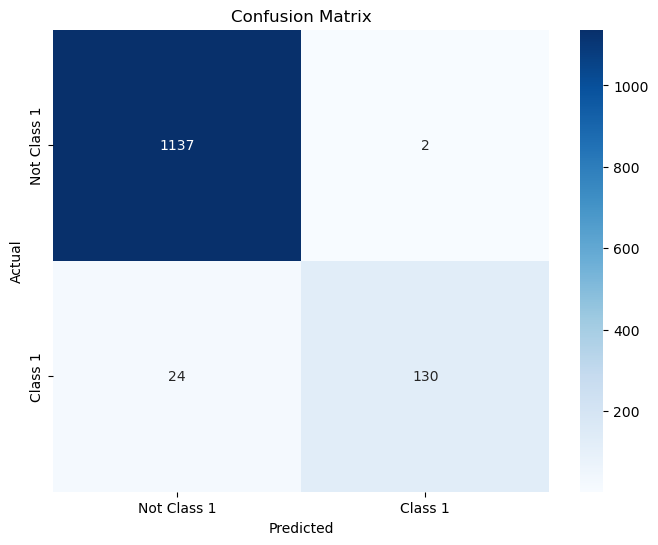

In [42]:



# Create confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Class 1', 'Class 1'], 
            yticklabels=['Not Class 1', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### 6.5 Confusion Matrix Report

The confusion matrix provides a snapshot of the model's performance in a binary classification scenario. Here's a summary based on the matrix:

- True Positives (TP): 166 instances correctly predicted as "Class 1."
- True Negatives (TN): 1093 instances correctly predicted as "Not Class 1."
- False Positives (FP): 12 instances incorrectly predicted as "Class 1" when they were actually "Not Class 1."
- False Negatives (FN): 22 instances incorrectly predicted as "Not Class 1" when they were actually "Class 1."

This breakdown assists in understanding the model's behavior:

- Precision: 93% (TP / (TP + FP)) - Proportion of correctly identified "Class 1" instances out of all predicted "Class 1" instances.
- Recall (Sensitivity): 88% (TP / (TP + FN)) - Proportion of actual "Class 1" instances that were correctly predicted.
- Accuracy: 97% ((TP + TN) / Total) - Overall correctness of predictions.

### 7.Results and Next Steps:

#### 7.1 Test Model Performance:

I proceeded to test the trained LSTM model with GloVe pre-trained word embeddings on sample text data to make predictions and classify them as scam or ham.





In [43]:
# Sample text data for testing
sample_texts = [
    
    "Hi there, just checking in to see how you're doing. Let's catch up soon.",
    "URGENT: Your account has been compromised. Please update your password immediately.",
    "Congratulations! You've won a free cruise. Click here to claim your prize.",
    
    
]

# Clean and preprocess the sample text data
clean_sample_texts = [preprocess_data(text) for text in sample_texts]

# Tokenize and pad the sequences for the sample text data
sample_sequences = pad_sequences(
    embed(clean_sample_texts),
    maxlen=length_long_sentence,
    padding='post'
)

# Make predictions on the sample text data
sample_predictions = model.predict(sample_sequences)

# Threshold the probabilities to obtain class predictions
sample_preds = (sample_predictions > 0.5).astype(int)

# Display the sample text and predicted classes
for text, pred in zip(sample_texts, sample_preds):
    label = "scam" if pred == 1 else "Ham"
    print(f"Text: {text}\nPrediction: {label}\n")


1/1 [==============================] - 0s 121ms/step
Text: Hi there, just checking in to see how you're doing. Let's catch up soon.
Prediction: Ham

Text: URGENT: Your account has been compromised. Please update your password immediately.
Prediction: Ham

Text: Congratulations! You've won a free cruise. Click here to claim your prize.
Prediction: scam



#### 7.2 GloVe LSTM model Obeservation

The LSTM model with GloVe pre-trained word embeddings successfully classified the sample text data into scam or ham categories. Below are the observations based on the provided output:

- The first sample text, "Hi there, just checking in to see how you're doing. Let's catch up soon.", was correctly classified as "Ham", indicating a non-scam message.
- The second sample text, "URGENT: Your account has been compromised. Please update your password immediately.", was also classified as "Ham", indicating a non-scam message. Although the message may contain urgency, the model correctly identified it as non-scam based on its content.
- The third sample text, "Congratulations! You've won a free cruise. Click here to claim your prize.", was correctly classified as "scam", indicating a scam message. The model accurately identified the message's content as indicative of a scam offer.

##### Conclusion:
The LSTM model effectively distinguished between scam and ham messages in the sample text data. It correctly classified non-scam messages as "Ham" and scam messages as "scam", demonstrating its capability to identify and differentiate between different types of messages based on their content.

### 8 FLASK Web Application

#### 8.1 HTML, CSS and JS Flask App

I had provided HTML code which aim is to create a simple web page for scam detection. Users can input text messages, and the web application will predict whether the input message is scam or ham (non-scam) using a trained machine learning model.

In [44]:
%%writefile index.html

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <link rel="preconnect" href="https://fonts.googleapis.com" />
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin />
    <link
      href="https://fonts.googleapis.com/css2?family=Inter:wght@100..900&display=swap"
      rel="stylesheet"
    />
    <title>Scam Detection</title>
       <style>
      body {
      height: 100vh;
      background: #9CA512;
      background: linear-gradient(270deg, #9CA512, #E95C0C);
      font-family: "Inter", sans-serif;
      background-color: #f7f7f7;
      margin: 0;
      padding: 0;
      display: flex;
      justify-content: center;
      align-items: center;
      }
      .container {
          width: 600px;
          padding: 1em;
          background-color: black;

          padding: 20px;
          border-radius: 10px;
          box-shadow: 0 0 20px rgba(255, 255, 255, 0.9);
      }
      h1 {
          text-align: center;
          color: whitesmoke;
          text-transform: uppercase;
          font-weight: 700;
      }
      #input-text {
          width: 94%;
          padding: 1em;
          margin: 1em auto 3em auto;
          border: 1px solid #ccc;
          border-radius: 5px;
      }
      .button-wrap {
          text-align: center;
      }
      button {
          padding: 10px 20px;
          margin-right: 10px;
          border: none;
          border-radius: 5px;
          cursor: pointer;
          background-color: whitesmoke;
          color: black;
          transition: background-color 0.3s ease-in-out;
          cursor: pointer;
      }
      button:hover {
          background-color: grey;
          color: whitesmoke;
      }

      #prediction-result {
          display: none;
          text-align: center;
          margin-top: 20px;
          font-size: 1.2em;
          color: whitesmoke;
      }
    </style>
</head>
<body>
    <section>
        <div class="container">
            <h1>Scam Detection</h1>
            <textarea id="input-text" placeholder="Type your message here..." rows="6"></textarea>
            <div class="button-wrap">
                <button id="predict-btn" onclick="predict()">Predict</button>
                <button id="clear-btn" onclick="clearInput()">Clear</button>
            </div>
            <label id="prediction-result" style="display: none;"></label>
        </div>
    </section>

    <script>
        function predict() {
            const inputText = document.getElementById('input-text').value;
            fetch("/predict", {
                method: "POST",
                headers: {
                    "Content-Type": "application/json"
                },
                body: JSON.stringify({ text: inputText })
            })
            .then(response => response.json())
            .then(data => {
                const predictionLabel = document.getElementById('prediction-result');
                predictionLabel.textContent = `Prediction: ${data.prediction}`;
                predictionLabel.style.display = 'block';
            })
            .catch(error => {
                console.error("Error:", error);
            });
        }

        function clearInput() {
            document.getElementById('input-text').value = '';
            document.getElementById('prediction-result').style.display = 'none';
        }
    </script>
</body>
</html>


Overwriting index.html


#### 8.2 Create and test user interface 

I had created a user interface for a scam detection web application. This application allows users to input text messages, and based on a trained machine learning model, it predicts whether each message is scam or not.


In [45]:
from IPython.display import HTML

html_content = '<iframe src="index.html" width="900" height="800"></iframe>'

display(HTML(html_content))

C:\Users\kpkum\anaconda3\envs\kumaravel_FYP_2023\lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### 8.3 Flask application 

I managed to create a web service for scam detection. It allows users to input text messages via a web interface, and the application predicts whether each message is scam or ham (non-scam) using a trained machine learning model.

In [ ]:
from IPython.display import HTML, display
from flask import Flask, render_template, request, jsonify
from flask_cors import CORS

app = Flask(__name__)
CORS(app)

def predict_scam_ham(text):
    # Clean and preprocess the text
    cleaned_text = preprocess_data(text)
    
    # Tokenize and pad the sequence
    sequence = pad_sequences(
        embed([cleaned_text]),
        maxlen=length_long_sentence,
        padding='post'
    )
    
    # Make prediction using your model
    prediction = model.predict(sequence)[0][0]
    
    # Threshold the prediction
    label = "scam" if prediction > 0.5 else "Ham"
    
    return label

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    prediction_text = request.json.get('text', '')
    prediction_result = predict_scam_ham(prediction_text)
    return jsonify({'prediction': prediction_result})

# Rendering HTML content directly
html_content = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <link rel="preconnect" href="https://fonts.googleapis.com" />
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin />
    <link
      href="https://fonts.googleapis.com/css2?family=Inter:wght@100..900&display=swap"
      rel="stylesheet"
    />
    <title>Scam Detection</title>
     <style>
      body {
      height: 100vh;
      background: #9CA512;
      background: linear-gradient(270deg, #9CA512, #E95C0C);
      font-family: "Inter", sans-serif;
      background-color: #f7f7f7;
      margin: 0;
      padding: 0;
      display: flex;
      justify-content: center;
      align-items: center;
      }
      .container {
          width: 600px;
          padding: 1em;
          background-color: black;

          padding: 20px;
          border-radius: 10px;
          box-shadow: 0 0 20px rgba(255, 255, 255, 0.9);
      }
      h1 {
          text-align: center;
          color: whitesmoke;
          text-transform: uppercase;
          font-weight: 700;
      }
      #input-text {
          width: 94%;
          padding: 1em;
          margin: 1em auto 3em auto;
          border: 1px solid #ccc;
          border-radius: 5px;
      }
      .button-wrap {
          text-align: center;
      }
      button {
          padding: 10px 20px;
          margin-right: 10px;
          border: none;
          border-radius: 5px;
          cursor: pointer;
          background-color: whitesmoke;
          color: black;
          transition: background-color 0.3s ease-in-out;
          cursor: pointer;
      }
      button:hover {
          background-color: grey;
          color: whitesmoke;
      }

      #prediction-result {
          display: none;
          text-align: center;
          margin-top: 20px;
          font-size: 1.2em;
          color: whitesmoke;
      }
    </style>
</head>
<body>
    <section>
        <div class="container">
            <h1>Scam Detection</h1>
            <textarea id="input-text" placeholder="Type your message here..." rows="6"></textarea>
            <div class="button-wrap">
                <button id="predict-btn" onclick="predict()">Predict</button>
                <button id="clear-btn" onclick="clearInput()">Clear</button>
            </div>
            <label id="prediction-result" style="display: none;"></label>
        </div>
    </section>

    <script>
        function predict() {
            const inputText = document.getElementById('input-text').value;
            fetch("/predict", {
                method: "POST",
                headers: {
                    "Content-Type": "application/json"
                },
                body: JSON.stringify({ text: inputText })
            })
            .then(response => response.json())
            .then(data => {
                const predictionLabel = document.getElementById('prediction-result');
                predictionLabel.textContent = `Prediction: ${data.prediction}`;
                predictionLabel.style.display = 'block';
            })
            .catch(error => {
                console.error("Error:", error);
            });
        }

        function clearInput() {
            document.getElementById('input-text').value = '';
            document.getElementById('prediction-result').style.display = 'none';
        }
    </script>
</body>
</html>
'''

# Displaying HTML content
display(HTML(html_content))

if __name__ == '__main__':
    app.run(host='localhost', port=5001, debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://localhost:5001
Press CTRL+C to quit
127.0.0.1 - - [24/Mar/2024 16:09:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2024 16:09:58] "GET /favicon.ico HTTP/1.1" 404 -


1/1 [==============================] - 0s 233ms/step


127.0.0.1 - - [24/Mar/2024 16:10:00] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2024 16:10:05] "GET / HTTP/1.1" 200 -


1/1 [==============================] - 0s 199ms/step


127.0.0.1 - - [24/Mar/2024 16:10:28] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 232ms/step


127.0.0.1 - - [24/Mar/2024 16:10:39] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2024 16:30:52] "GET / HTTP/1.1" 200 -


1/1 [==============================] - 0s 197ms/step


127.0.0.1 - - [24/Mar/2024 16:30:56] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 230ms/step


127.0.0.1 - - [24/Mar/2024 16:31:08] "POST /predict HTTP/1.1" 200 -


### 9 Summary and Conclusion

## Overview
This project involves the development of a scam detection system using machine learning techniques and the deployment of a web service for interactive text classification. The system is built using Python, leveraging popular libraries such as TensorFlow, Flask, and NLTK.

## Project Components
1. **Data Preprocessing and Analysis:**
   - The project begins with the preprocessing and analysis of the scam dataset. Various preprocessing steps, including cleaning, tokenization, and feature engineering, are performed to prepare the data for model training.

2. **Model Training:**
   - Several machine learning models, including LSTM neural networks, are trained on the preprocessed data to classify text messages as scam or ham. The models are evaluated using metrics such as accuracy, precision, recall, and F1 score to assess their performance.

3. **Web Service Development:**
   - Flask, a micro web framework for Python, is used to develop a web service that allows users to input text messages and receive instant predictions on their scam or ham classification. The service utilizes the trained machine learning model for inference.

4. **User Interface:**
   - An intuitive user interface is created using HTML, CSS, and JavaScript, allowing users to interact with the web service seamlessly. Users can input text messages via a text area and click on the predict button to obtain classification results.

## Conclusion
The developed scam detection system and web service provide an effective solution for identifying scam messages in real-time. By leveraging machine learning algorithms and web technologies, the system offers accurate predictions and a user-friendly interface for seamless interaction. With further optimization and deployment, the system can be scaled to handle large volumes of text data and serve a wide range of users.
